<a href="https://colab.research.google.com/github/fabricio-franca/Data-Science/blob/main/CNN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rede neural com keras + tensorflow




Fashion-MNIST é um conjunto de dados de imagens de artigos de Zalando – consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza 28x28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como um substituto direto para o conjunto de dados MNIST original para benchmarking de algoritmos de aprendizado de máquina. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste. O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade AI/ML/Data Science adoram esse conjunto de dados e o usam como referência para validar seus algoritmos. Na verdade, o MNIST é frequentemente o primeiro conjunto de dados que os pesquisadores tentam.  “Se não funcionar no MNIST, não funcionará de jeito nenhum”, disseram. "Bem, se funcionar no MNIST, ainda poderá falhar em outros."

Zalando busca substituir o conjunto de dados MNIST original

Descrição dos dados
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels.
Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou escuridão daquele pixel, com números mais altos significando mais escuro. Este valor de pixel é um número inteiro entre 0 e 255.
Os conjuntos de dados de treinamento e teste possuem 785 colunas.
A primeira coluna consiste nas etiquetas das classes (veja acima) e representa a peça de roupa.
O restante das colunas contém os valores de pixel da imagem associada.
Para localizar um pixel na imagem, suponha que tenhamos decomposto x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 . Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e na segunda linha do topo, como no diagrama ASCII abaixo.

In [1]:
# importando as bibliotecas

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# versao das bibliotecas

print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [3]:
# importando o dataset

fashion_mnist = keras.datasets.fashion_mnist


In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
# Nomes das classes

class_names = ["0-T-shirt/top", "1-Trouser", "2-Pullover", "3-Dress", "4-Coat",
               "5-Sandal", "6-Shirt", "7-Sneaker", "8-Bag", "9-Ankle boot"]

In [7]:
class_names[1]

'1-Trouser'

In [8]:
# Explorar o dataset

print(type(X_train))
print(X_train.shape)
print(X_train.dtype)

print(type(y_train))
print(y_train.shape)
print(y_train.dtype)

<class 'numpy.ndarray'>
(60000, 28, 28)
uint8
<class 'numpy.ndarray'>
(60000,)
uint8


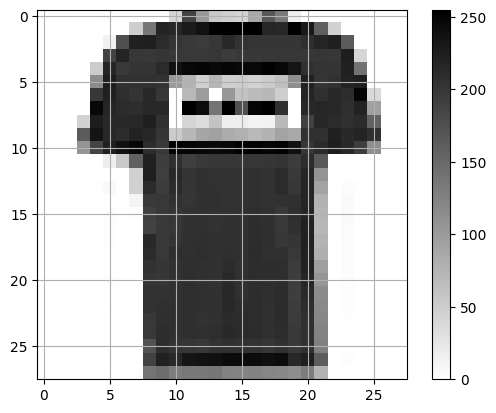

In [9]:
# Exibir a imagem

plt.figure()
plt.imshow(X_train[1], cmap = plt.cm.binary)
plt.colorbar() #barra com escala de cores
plt.grid(True)
plt.show()
#

In [10]:
range(25)

range(0, 25)

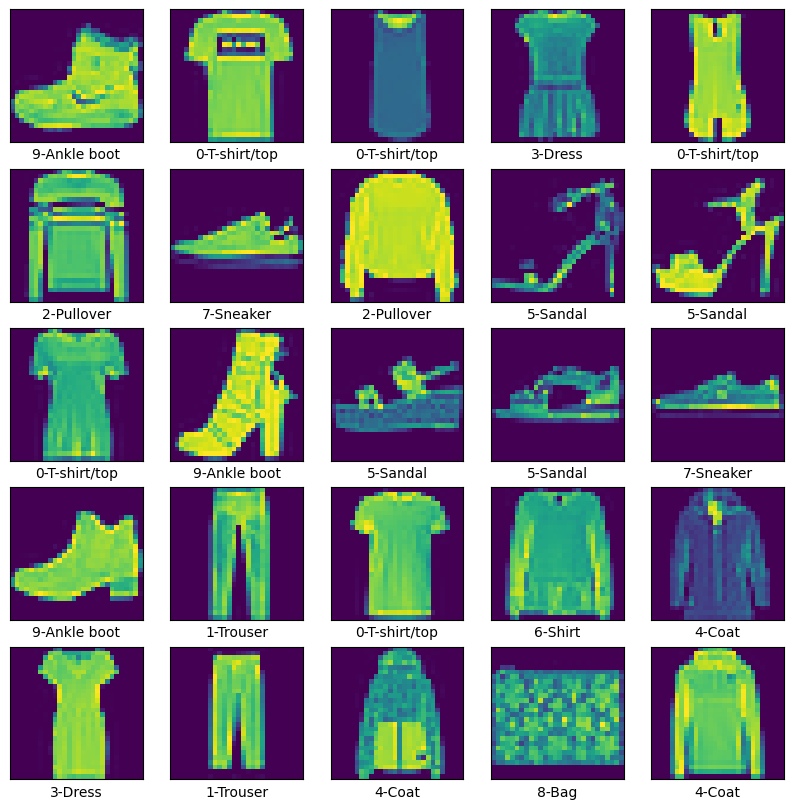

In [11]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()
#

## **Preparação dos Dados para a Rede Neural**
Modelos de redes neurais, como CNNs (Redes Neurais Convolucionais), esperam que os dados de entrada sejam fornecidos em um formato específico. Para imagens, o formato típico é:
(número de amostras, altura, largura, canais),

* Número de amostras: Quantidade total de imagens no conjunto de dados.
* Altura e Largura: Dimensões da imagem.
* Canais: Número de canais de cor (1 para imagens em escala de cinza, 3 para RGB).
Muitas vezes, as imagens são fornecidas como vetores achatados (por exemplo, 28x28 pixels podem ser representados como um vetor de 784 números), mas as redes convolucionais precisam que essas imagens tenham a forma tridimensional original (altura, largura, canais) para processar corretamente os dados.

Por exemplo, para uma imagem de 28x28 pixels em escala de cinza, você precisaria que os dados tenham a forma (28, 28, 1) para que o modelo entenda que a imagem tem 28 pixels de altura, 28 de largura, e 1 canal (escala de cinza). Se as imagens estão achatadas como vetores de 784 elementos, você usa reshape para dar a elas o formato correto antes de alimentar a rede neural.

In [12]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

# **Etapas para criar as Redes Neurais Convolucionais (CNN)**
1. Definir modelo
2. Compilação do modelo
3. Treino do Modelo
Em primeiro lugar, vamos definir a forma da imagem antes de definirmos o modelo. Definiu o formato da imagem como 3D com linhas e colunas e 1 para visualização 3D

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state = 12345)

**Defina o modelo**

A primeira camada na rede modelo, keras.layers.
Flatten, transforma o formato das imagens de um array bidimensional (de 28 por 28 pixels) para um array unidimensional (de 28 * 28 = 784 pixels). Esta camada desempilha linhas de pixels na imagem e alinha-as e não possui parâmetros para aprender; ele apenas reformata os dados.

Depois que os pixels são achatados, a rede consiste em uma sequência de duas camadas keras.layers.Dense. Estas são camadas neurais densamente conectadas ou totalmente conectadas.
A primeira camada Densa possui 32 nós (ou neurônios). A segunda (e última) camada é uma camada softmax de 10 nós que retorna uma matriz de 10 pontuações de probabilidade que somam 1. Cada nó contém uma pontuação que indica a probabilidade de a imagem atual pertencer a uma das 10 classes.

In [15]:
x_train.shape[0]

48000

In [16]:
x_train = x_train.reshape(x_train.shape[0],28,28,1) # 28 numero de pixels, 1 escala de cinza se fosse colorida seria 3 RGB
x_test = X_test.reshape(X_test.shape[0],28,28,1)
x_validate = x_validate.reshape(x_validate.shape[0],28,28,1)

In [17]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

1. cnn_model = Sequential([...]):
Sequential é uma API que permite criar modelos camada por camada em Keras. Ele cria uma "pilha" linear de camadas. Neste caso, as camadas estão sendo definidas dentro da lista, o que facilita a construção do modelo de forma ordenada.
2. Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape):
Conv2D é uma camada convolucional 2D que aplica convoluções nas imagens de entrada. Esta camada é a base das CNNs.
filters=32: Define o número de filtros (ou kernels) usados na convolução. Cada filtro aprende diferentes características das imagens, como bordas, texturas, etc. Neste caso, 32 filtros serão aplicados.
kernel_size=3: Define o tamanho da janela (ou kernel) que percorre a imagem durante a convolução. Um kernel de 3x3 é muito comum em CNNs.
activation='relu': Aplica a função de ativação ReLU (Rectified Linear Unit), que torna a saída não-linear e ajuda a rede a aprender características complexas. ReLU é definida como max(0, x), o que elimina valores negativos.
input_shape=image_shape: Define o formato da imagem de entrada, especificando as dimensões (altura, largura e número de canais). Por exemplo, para imagens de 28x28 pixels com 1 canal (em escala de cinza), image_shape seria (28, 28, 1). Essa é a primeira camada, então precisa saber a forma dos dados de entrada.
3. MaxPooling2D(pool_size=2):
MaxPooling2D é uma camada de pooling que realiza uma operação de redução dimensional. Ela pega a saída da camada convolucional e reduz sua resolução.
pool_size=2: Aplica o max pooling com uma janela de 2x2, o que reduz as dimensões da imagem pela metade. Ou seja, se a entrada é 28x28, a saída será 14x14. Esse processo ajuda a diminuir a quantidade de parâmetros, evitando overfitting e tornando o modelo mais eficiente.
O max pooling seleciona o valor máximo dentro de cada região 2x2 da imagem.
4. Dropout(0.2):
Dropout é uma técnica de regularização que ajuda a evitar o overfitting. Durante o treinamento, ele desativa aleatoriamente 20% das unidades da camada a cada iteração, forçando a rede a ser mais robusta e a não depender demais de qualquer unidade em particular.
0.2 indica que 20% dos neurônios da camada anterior serão desativados durante cada iteração do treinamento.
5. Flatten():
Flatten pega a saída 2D (ou 3D) da camada convolucional/pooling e a "achata" em um vetor 1D (unidimensional), para que possa ser passada para camadas totalmente conectadas (densas).
Por exemplo, se a saída da última camada for de dimensão (14, 14, 32) (14x14 pixels e 32 filtros), o Flatten a transformará em um vetor de 6.272 elementos (14x14x32).
6. Dense(32, activation='relu'):
Dense é uma camada totalmente conectada (fully connected). Cada neurônio nesta camada está conectado a todos os neurônios da camada anterior.
32: Indica que esta camada terá 32 neurônios.
activation='relu': Aplica a função de ativação ReLU novamente, introduzindo não-linearidade para permitir que o modelo aprenda padrões complexos.
7. Dense(10, activation='softmax'):
Outra camada Dense, mas com 10 neurônios e uma ativação softmax.
10: Indica que a camada terá 10 neurônios, o que corresponde ao número de classes de saída (por exemplo, se estivermos classificando dígitos de 0 a 9, temos 10 classes).
activation='softmax': A função softmax transforma as saídas dessa camada em probabilidades, garantindo que a soma das saídas seja 1, com cada valor representando a probabilidade de a amostra pertencer a uma das 10 classes.


In [18]:
cnn_model = Sequential([
    Conv2D(filters = 32, kernel_size = 3,activation = 'relu',input_shape = image_shape),
    MaxPooling2D(pool_size = 2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32, activation ='relu'),
    Dense(10, activation = 'softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [20]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,738 (678.66 KB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

loss='sparse_categorical_crossentropy':

A função de perda (loss function) mede o quão bem o modelo está performando, e é usada para ajustar os pesos da rede neural durante o treinamento.
sparse_categorical_crossentropy é uma versão otimizada da função de perda categorical_crossentropy para problemas de classificação multiclasse onde as classes são fornecidas como rótulos inteiros (integers) em vez de one-hot encoded.
categorical_crossentropy normalmente espera que as classes sejam fornecidas como um vetor one-hot (onde, para uma classe C, o vetor seria [0, 0, 1, 0, 0]), enquanto sparse_categorical_crossentropy permite que as classes sejam passadas como inteiros, como [2, 0, 1], sem necessidade de codificar manualmente.
Essa função de perda é apropriada para tarefas de classificação multiclasse.
optimizer=Adam(lr=0.001):

O otimizador ajusta os pesos da rede neural com base nos erros calculados pela função de perda.
Adam (Adaptive Moment Estimation) é um dos otimizadores mais usados em redes neurais, combinando as vantagens do RMSProp e do Gradient Descent com momentum. Ele é eficiente, precisa de pouca memória e é bom para problemas com muitos parâmetros ou dados ruidosos.
lr=0.001 define a taxa de aprendizado (learning rate), que controla o tamanho dos passos de ajuste dos pesos durante o treinamento. Um valor de 0.001 é frequentemente usado como valor padrão, garantindo um ajuste suave e evitando saltos grandes demais nos valores dos pesos.
metrics=['accuracy']:

As métricas são usadas para monitorar o desempenho do modelo. Elas não afetam o treinamento, mas são calculadas e exibidas durante o processo de treinamento.
accuracy é uma métrica comum para problemas de classificação e mede a porcentagem de previsões corretas do modelo. Para cada época, será calculada e exibida a acurácia do modelo tanto no treinamento quanto na validação (se houver).

In [21]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size = 4096,
    epochs = 75,
    verbose = 1,
    validation_data = (x_validate,y_validate),
)

Epoch 1/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.2760 - loss: 14.2479 - val_accuracy: 0.5021 - val_loss: 1.5896
Epoch 2/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4612 - loss: 1.6699 - val_accuracy: 0.4767 - val_loss: 1.4561
Epoch 3/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4872 - loss: 1.4016 - val_accuracy: 0.5837 - val_loss: 1.1140
Epoch 4/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5892 - loss: 1.1551 - val_accuracy: 0.6497 - val_loss: 0.9549
Epoch 5/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6389 - loss: 1.0184 - val_accuracy: 0.6843 - val_loss: 0.8719
Epoch 6/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6787 - loss: 0.9209 - val_accuracy: 0.7057 - val_loss: 0.7871
Epoch 7/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7006 - loss: 0.8299 - val_accuracy: 0.7254 - val_loss: 0.7196
Epoch 8/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7221 - loss: 0.7581 - val_accuracy: 0.7488 -

Text(0.5, 1.0, 'Train - Accuracy')

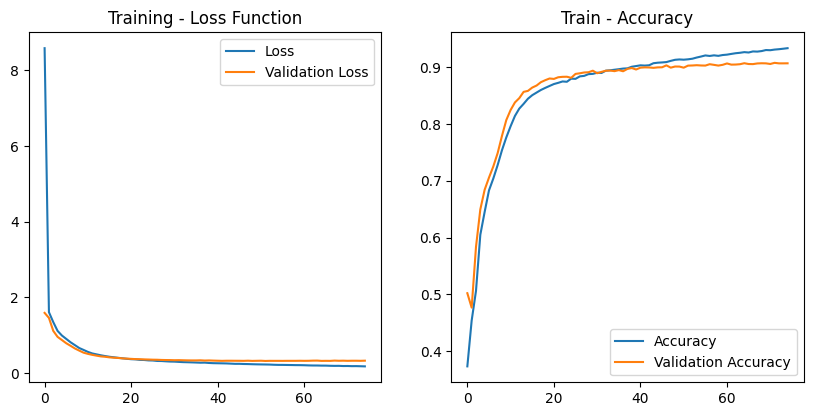

In [22]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [23]:

score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3366
Test Accuracy : 0.8976


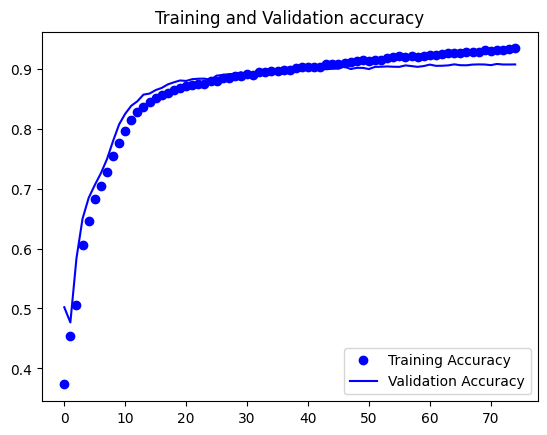

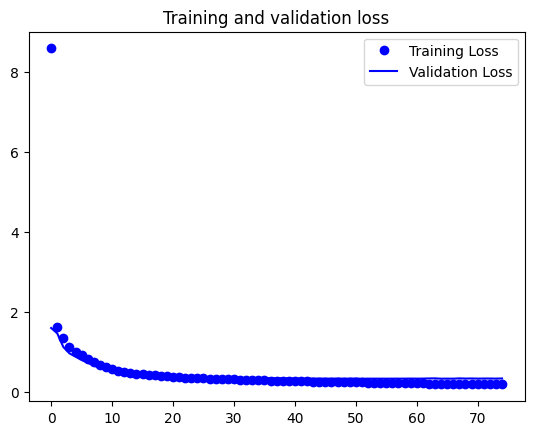

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
import numpy as np

# Faz as previsões com o modelo
predictions = cnn_model.predict(x_test)

# Pega a classe com a maior probabilidade em cada previsão
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [27]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

In [28]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [29]:
num_classes = 10

In [30]:
#Get the indices to be plotted
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!= y_test)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.81      0.84      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.86      0.81      0.84      1000
     Class 3       0.91      0.88      0.90      1000
     Class 4       0.83      0.85      0.84      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.67      0.76      0.71      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



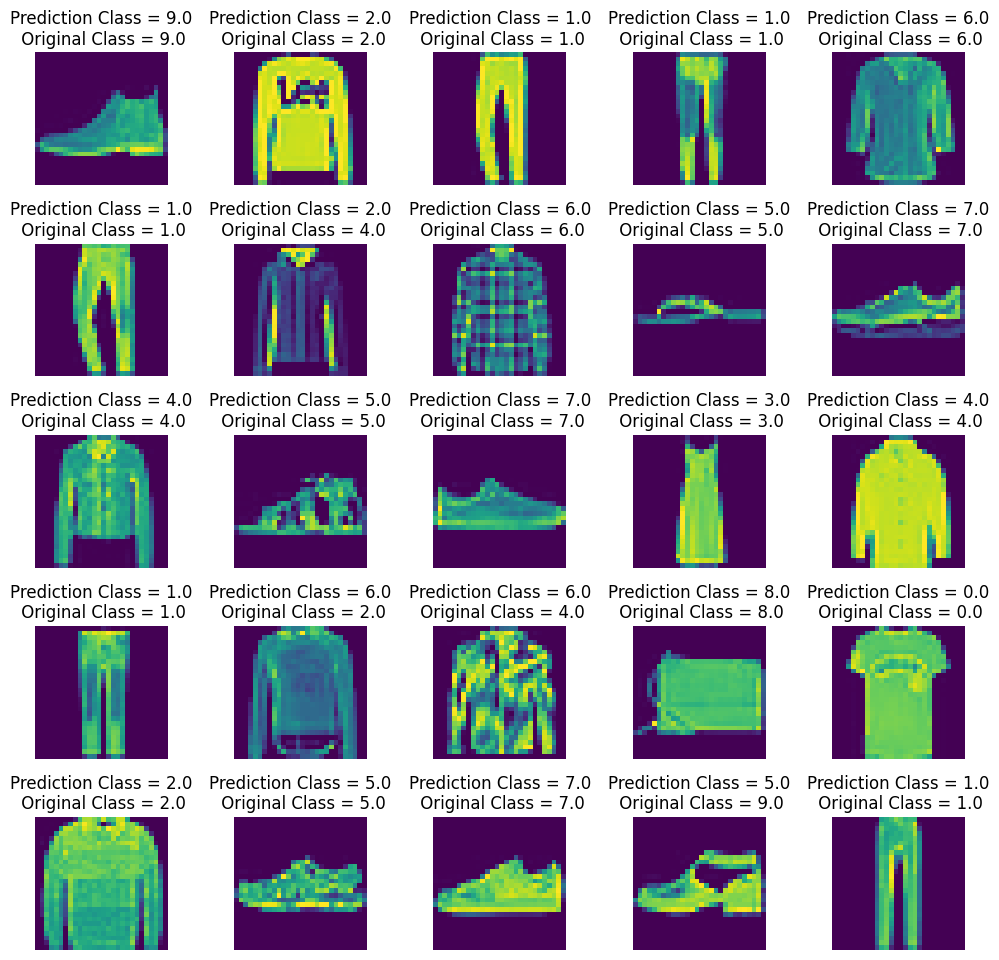

In [31]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)